In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imread
%matplotlib inline
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


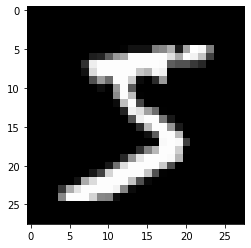

In [13]:
plt.imshow(X_train[0], cmap="gray")

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(4,4), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                46090     
Total params: 46,634
Trainable params: 46,634
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [28]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), batch_size=10, callbacks=[early_stop])

Epoch 1/10
6000/6000 [==============================] - 88s 15ms/step - loss: 0.1575 - accuracy: 0.9533 - val_loss: 0.0609 - val_accuracy: 0.9801
Epoch 2/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.0503 - val_accuracy: 0.9844
Epoch 3/10
6000/6000 [==============================] - 71s 12ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0500 - val_accuracy: 0.9834
Epoch 4/10
6000/6000 [==============================] - 80s 13ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0458 - val_accuracy: 0.9851
Epoch 5/10
6000/6000 [==============================] - 69s 12ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 6/10
6000/6000 [==============================] - 61s 10ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0482 - val_accuracy: 0.9857
Epoch 7/10
6000/6000 [==============================] - 60s 10ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0482 -

In [30]:
loss = pd.DataFrame(model.history.history)

In [31]:
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.157460,0.953317,0.060936,0.9801
1,0.060970,0.982000,0.050282,0.9844
2,0.043914,0.986700,0.050018,0.9834
3,0.033645,0.989567,0.045822,0.9851
4,0.025684,0.992000,0.045338,0.9862


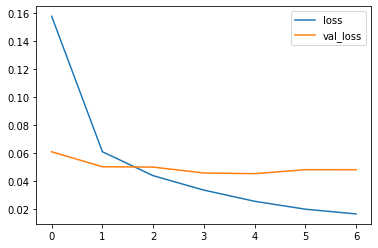

In [32]:
loss[["loss", "val_loss"]].plot()

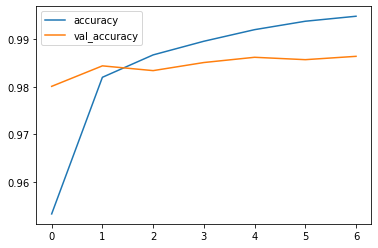

In [33]:
loss[["accuracy", "val_accuracy"]].plot()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
y_preds = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
confusion_matrix(y_test, y_preds)

array([[ 972,    0,    2,    2,    0,    0,    3,    0,    1,    0],
       [   0, 1131,    1,    2,    0,    0,    0,    1,    0,    0],
       [   0,    1, 1018,    4,    0,    0,    3,    4,    2,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    1,    0,    0],
       [   1,    0,    1,    0,  974,    0,    1,    0,    0,    5],
       [   1,    0,    0,    5,    0,  883,    2,    0,    1,    0],
       [   5,    2,    1,    0,    1,    4,  942,    1,    2,    0],
       [   0,    2,    8,    3,    0,    1,    0, 1013,    1,    0],
       [   5,    1,    4,    2,    1,    1,    3,    4,  950,    3],
       [   1,    1,    1,    9,    9,    6,    0,    6,    0,  976]],
      dtype=int64)

In [43]:
from tensorflow.keras.models import load_model
model.save("Mnist.h5")